In [1]:
from new_thesis_library import *
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [9]:
%%capture output

theta, time = optimize_on_day_with_starting_values(date_number = 10, method = 'L-BFGS-B', theta0 = np.array([1, 1, 1, 1, 1, 1]))

In [10]:
theta, time

(array([ 0.97884389,  0.94028419,  0.08493359, -0.01839614, -0.03141298,
        -0.01976536]),
 2.461995)

In [7]:
%%capture output

theta, time = optimize_on_day_with_starting_values(date_number = 10, method = 'Powell', theta0 = np.array([1, 1, 1, 1, 1, 1]))

In [8]:
theta, time

(array([ 3.01922851e+08,  1.69044572e+08,  8.78640271e+06, -8.78640265e+06,
         1.11073133e+07, -1.07047818e+07]),
 29.922401)

In [11]:
%%capture output

theta, time = optimize_on_day_with_starting_values(date_number = 10, method = 'trust-constr', theta0 = np.array([1, 1, 1, 1, 1, 1]))

In [12]:
theta, time

(array([ 1.48899315e+01,  1.38331630e+01,  4.78633554e-02,  7.95357370e-03,
        -4.30087189e-01,  5.22544614e-01]),
 13.417514)

In [13]:
%%capture output

theta, time = optimize_on_day_with_starting_values(date_number = 10, method = 'Nelder-Mead', theta0 = np.array([1, 1, 1, 1, 1, 1]))

In [15]:
theta, time

(array([ 2.57415653,  2.94526336,  0.08263317, -0.02527857, -0.12075774,
         0.1200353 ]),
 16.517108)

In [14]:
%%bash
say finished

/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/new_thesis_library.py:32: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


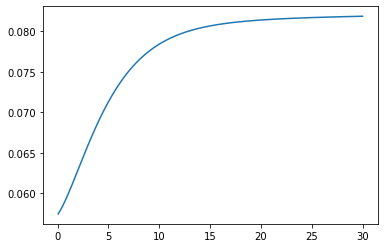

In [19]:
m = np.linspace(0, 30, 600)
plt.plot(m, nss(m, theta))

# Previous day values

### Best theta on day 1

Зафитим кривую на ставки ЦБ на первый день. Дальше будем использовать веса предыдущего дня.

In [2]:
cbr_maturities = np.array([0.25, 0.50, 0.75, 1.00, 2.00, 3.00, 5.00, 7.00, 10.00, 15.00, 20.00, 30.00])
cbr_rates_060114 = np.array([5.92, 6.02, 6.10, 6.19, 6.50, 6.77, 7.21, 7.55, 7.91, 8.29, 8.50, 8.72])

In [3]:
def fit_curve(theta):
    return ((cbr_rates_060114 - nss(cbr_maturities, theta))**2).sum()

In [4]:
theta0 = np.array([10, 10, 10, 10, 10, 10])

best_theta = minimize(fit_curve, theta0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True, 'maxiter': 10000})

Optimization terminated successfully.
         Current function value: 0.000078
         Iterations: 854
         Function evaluations: 1433


/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/new_thesis_library.py:32: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


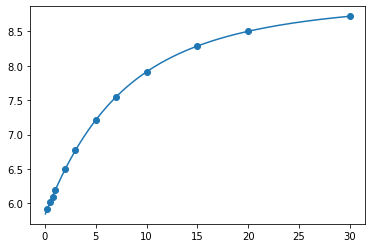

In [5]:
m = np.linspace(0, 30, 600)
plt.scatter(cbr_maturities, cbr_rates_060114)
plt.plot(m, nss(m, best_theta.x))

## BFGS

In [7]:
%%capture output

thetas = np.zeros([len(dates), 6])
time = np.zeros(len(dates))

for i in range(10):
    if i != 0:        
        thetas[i], time[i] = optimize_on_day_with_starting_values(i, 'L-BFGS-B', theta0 = thetas[i - 1])        
    else:
        thetas[i], time[i] = optimize_on_day_with_starting_values(i, 'L-BFGS-B', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Thetas/l_bfgs_b_recurrent.csv')

In [8]:
%%bash
say finished

/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/new_thesis_library.py:32: RuntimeWarning: invalid value encountered in true_divide
  return beta0 + beta1 * (1 - np.exp(- m / tau1)) / (m / tau1) + beta2 * ((1 - np.exp(- m / tau1)) / (m / tau1) - np.exp(- m / tau1)) + beta3 * ((1 - np.exp(- m / tau2)) / (m / tau2) - np.exp(- m / tau2))


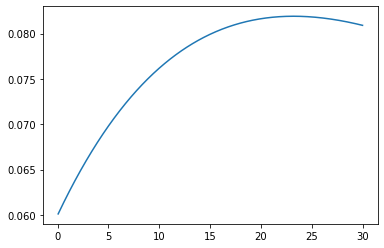

In [19]:
m = np.linspace(0, 30, 600)
#plt.scatter(cbr_maturities, cbr_rates_060114)
plt.plot(m, nss(m, thetas[0:1].values[0]))

## Gauss-Newton

In [14]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'Gauss-Newton', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'Gauss-Newton', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Thetas/gauss_newton_recurrent.csv')

CPU times: user 43 s, sys: 48.9 ms, total: 43.1 s
Wall time: 43.1 s


## Nelder-Mead

In [12]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'nelder-mead', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'nelder-mead', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Thetas/nelder_mead_recurrent.csv')

CPU times: user 10min 53s, sys: 2.39 s, total: 10min 55s
Wall time: 11min


## Powell

In [13]:
%%time

thetas = np.zeros([len(thesis_library.dates), 6])

for i in range(len(thesis_library.dates)):
    if i != 0:        
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'powell', theta0 = thetas[i - 1])        
    else:
        thetas[i] = thesis_library.optimize_on_day_with_starting_values(i, 'powell', theta0 = best_theta.x)

thetas = pd.DataFrame(thetas, index = thesis_library.dates, columns = ['tau1', 'tau2', 'beta0', 'beta1', 'beta2', 'beta3'])
thetas.to_csv('/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/Thetas/powell_recurrent.csv')

/Users/andrey_lukyanov/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/andrey_lukyanov/Google_Drive/Studies/Year_4/Курсач/Coding/Comparing-numerical-methods-for-term-structure-fitting/thesis_library.py:70: RuntimeWarning: overflow encountered in square
  J = (((np.array(result_df['Discounted']) - np.array(result_df['Market prices']))/1000)**2).sum()
/Users/andrey_lukyanov/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/andrey_lukyanov/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/Users/andrey_lukyanov/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars


CPU times: user 32min 38s, sys: 4.31 s, total: 32min 43s
Wall time: 32min 53s


In [11]:
%%bash
say finished